In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
dff = pd.read_csv("/content/drive/MyDrive/full_inference/hin/hin_conf_full.csv",lineterminator="\n")


In [5]:
tot=pd.read_csv('/content/drive/MyDrive/total_data_twitter.csv',lineterminator="\n")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,17,24,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
tot=tot[['_id','language','content_type']]

In [7]:
df=dff.merge(tot, on='_id', how='inner')


In [8]:
df.shape

(266522, 11)

In [9]:
df=df.loc[df['content_type'] == 'text'] #no images,videos and gifs


In [10]:
df.shape

(242992, 11)

In [15]:
df=df.drop_duplicates(subset=['tweet']) #remove suplicates based on tweet


In [16]:
df.shape

(237356, 11)

In [17]:
cols = ['hinconst21_hibert_confidence', 'hinhasoc20_l3_confidence','hintrac1_confidence','hintrac2a_confidence']
df['mean_all'] = df[cols].mean(axis=1)
df.sort_values(by='mean_all', ascending=False, inplace=True)

In [18]:
df

,Unnamed: 0,_id,tweet_id,tweet,hinconst21_hibert_confidence,search,hinhasoc20_l3_confidence,hintrac1_confidence,hintrac2a_confidence,language,content_type,mean_all
23829,23829,61c1bf64886c615c5743c114,1439635555529248772,ये तो बावला होंजाएगा चलो तलवे चाटने और दरबार म...,1.0,मुजरा,1.0,0.91,0.89,hi,text,0.95
112257,112257,61cb45341d947ed5f33318f1,1445788990741749760,"भोसडीके"" जय हींद "" जो तुने राजनीती कर रहा है।य...",1.0,भोस्डीके,1.0,0.91,0.89,hi,text,0.95
94102,94102,61cb3233a144172bdda52b7a,1266365792091701251,एक नया मादरजात पैदा हुआ है जिसका नाम है दीपक झ...,1.0,मादरजात,1.0,0.91,0.89,hi,text,0.95
173200,173200,61e51a460843dffd91b229b6,1076287904937324545,@RKhatri14 मुल्ले पाकिस्तान जाये और हिन्दू तो ...,1.0,कुत्ती,1.0,0.91,0.89,hi,text,0.95
105973,105973,61cb4008874027a5e071797e,1219292002795180032,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",1.0,हरामी,1.0,0.91,0.89,hi,text,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...
240561,240561,61e18a7672115c8f12abad09,1185508072875184128,@PoonamHockey शुभकामनाएं 💐💐💐💐💐,0.0,PoonamHockey,0.0,0.14,0.02,hi,text,0.04
226433,226433,61e1155fcc498f75d018733c,1419250418807316480,@sanaak21 @AshrafZohoor आपकी राय? https://t.c...,0.0,sanaak21,0.0,0.14,0.02,hi,text,0.04
230583,230583,61e124b2d27c0a6f757eb6ac,1343916664837066752,@mangeshkarlata 💐💐कोटी कोटी नमन 🙏🙏,0.0,mangeshkarlata,0.0,0.14,0.02,hi,text,0.04
236742,236742,61e137391bdc4f8ef30a05ee,1210074299140210688,@realshooterdadi नमन सरदार जी🙏🙏,0.0,realshooterdadi,0.0,0.14,0.02,hi,text,0.04


In [19]:
df['mean_all'] = df['mean_all'].apply(lambda x: np.round(x, 2))

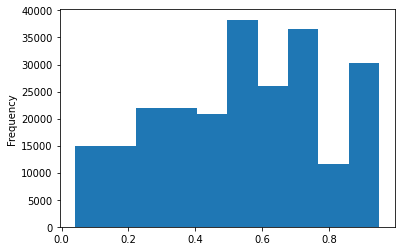

In [20]:
df['mean_all'].plot(kind='hist')

In [21]:
df1= df[df['mean_all'].between(0, 0.1,inclusive='both')]
df2= df[df['mean_all'].between(0.11, 0.2,inclusive='both')]
df3= df[df['mean_all'].between(0.21, 0.3,inclusive='both')]
df4= df[df['mean_all'].between(0.31, 0.4,inclusive='both')]
df5= df[df['mean_all'].between(0.41, 0.5,inclusive='both')]
df6= df[df['mean_all'].between(0.51, 0.6,inclusive='both')]
df7= df[df['mean_all'].between(0.61, 0.7,inclusive='both')]
df8= df[df['mean_all'].between(0.71, 0.8,inclusive='both')]
df9= df[df['mean_all'].between(0.81, 0.9,inclusive='both')]
df10= df[df['mean_all'].between(0.91, 1,inclusive='both')]


In [22]:
df1.shape

(9844, 12)

In [23]:
df2.shape

(17266, 12)

In [24]:
df3.shape

(22282, 12)

In [25]:
df4.shape

(24334, 12)

In [26]:
df5.shape

(27241, 12)

In [27]:
df6.shape

(37372, 12)

In [28]:
df7.shape

(39028, 12)

In [29]:
df8.shape

(22438, 12)

In [30]:
df9.shape

(17778, 12)

In [31]:
df10.shape

(19773, 12)

In [32]:
df11=df1.sample(n=400,random_state=1)
df12=df2.sample(n=800,random_state=1)
df13=df3.sample(n=800,random_state=1)
df14=df4.sample(n=1000,random_state=1)
df15=df5.sample(n=1000,random_state=1)
df16=df6.sample(n=1000,random_state=1)
df17=df7.sample(n=1000,random_state=1)
df18=df8.sample(n=800,random_state=1)
df19=df9.sample(n=800,random_state=1)
df20=df10.sample(n=400,random_state=1)

In [33]:
frames = [df11,df12,df13,df14,df15,df16,df17,df18,df19,df20]


In [34]:
result = pd.concat(frames)
display(result)

,Unnamed: 0,_id,tweet_id,tweet,hinconst21_hibert_confidence,search,hinhasoc20_l3_confidence,hintrac1_confidence,hintrac2a_confidence,language,content_type,mean_all
213089,213089,61dd3699f453ec932bdd7215,979223732878172161,@anishapadukone कृपया कर आपके ngo की जानकारी द...,0.00,anishapadukone,0.00,0.14,0.05,hi,text,0.05
245416,245416,61e1a42dff8ef2dfd8f9e30f,1189535643304517632,@anitahasnandani सो कोल्ड ड्रामा😂😂😂,0.03,anitahasnandani,0.03,0.14,0.02,hi,text,0.06
223654,223654,61e10b1e85ff1e72f741560e,1448960181203705859,@spruhavarad खूप छान👌,0.00,spruhavarad,0.00,0.14,0.02,hi,text,0.04
263646,263646,61e480a5c125920a4b7b7169,1288463415799758849,@salonayy Acchaa Acchaa 😂😂😂,0.00,salonayy,0.20,0.14,0.02,hi,text,0.09
249904,249904,61e282b14cffadb7b4381d32,1193067203425292288,@moonstar4u जय श्री राम🚩,0.05,moonstar4u,0.00,0.14,0.03,hi,text,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
164475,164475,61e469219b81511f179f9f32,1200407934997614592,"इन निकम्मो के बस का नहीं, ये कुछ नहीं करेंगे ...",0.99,पिछवाड़ा,1.00,0.89,0.87,hi,text,0.94
106018,106018,61cb400c874027a5e0717992,1219275480487956480,@varnishant हरामी सिर्फ Brahman में ही नहीं ह...,0.99,हरामी,1.00,0.85,0.87,hi,text,0.93
101629,101629,61cb3d442fa8b767a6dede80,1269655698838712320,मुस्लिमो से एक वात पूछना था।शरिया मे लिखा हे म...,0.99,शरिया,0.99,0.90,0.87,hi,text,0.94
78396,78396,61cb1a64d33b6977a2f3c2db,1300493842194415616,मोदी ने इसी कारण देसी कुकुरा पालने को बोला है।...,0.99,पॉटी,0.97,0.91,0.87,hi,text,0.94


In [35]:
import re
def remove_usernames_links(tweet):
  tweet=re.sub(r'@(\S+)\s?','<handle replaced>',tweet)
  tweet = re.sub('http[^\s]+','',tweet) #remove links
  return tweet
result['tweet_edit'] = result['tweet'].apply(remove_usernames_links)

In [36]:
result

,Unnamed: 0,_id,tweet_id,tweet,hinconst21_hibert_confidence,search,hinhasoc20_l3_confidence,hintrac1_confidence,hintrac2a_confidence,language,content_type,mean_all,tweet_edit
213089,213089,61dd3699f453ec932bdd7215,979223732878172161,@anishapadukone कृपया कर आपके ngo की जानकारी द...,0.00,anishapadukone,0.00,0.14,0.05,hi,text,0.05,<handle replaced>कृपया कर आपके ngo की जानकारी ...
245416,245416,61e1a42dff8ef2dfd8f9e30f,1189535643304517632,@anitahasnandani सो कोल्ड ड्रामा😂😂😂,0.03,anitahasnandani,0.03,0.14,0.02,hi,text,0.06,<handle replaced>सो कोल्ड ड्रामा😂😂😂
223654,223654,61e10b1e85ff1e72f741560e,1448960181203705859,@spruhavarad खूप छान👌,0.00,spruhavarad,0.00,0.14,0.02,hi,text,0.04,<handle replaced>खूप छान👌
263646,263646,61e480a5c125920a4b7b7169,1288463415799758849,@salonayy Acchaa Acchaa 😂😂😂,0.00,salonayy,0.20,0.14,0.02,hi,text,0.09,<handle replaced>Acchaa Acchaa 😂😂😂
249904,249904,61e282b14cffadb7b4381d32,1193067203425292288,@moonstar4u जय श्री राम🚩,0.05,moonstar4u,0.00,0.14,0.03,hi,text,0.06,<handle replaced>जय श्री राम🚩
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164475,164475,61e469219b81511f179f9f32,1200407934997614592,"इन निकम्मो के बस का नहीं, ये कुछ नहीं करेंगे ...",0.99,पिछवाड़ा,1.00,0.89,0.87,hi,text,0.94,"इन निकम्मो के बस का नहीं, ये कुछ नहीं करेंगे ..."
106018,106018,61cb400c874027a5e0717992,1219275480487956480,@varnishant हरामी सिर्फ Brahman में ही नहीं ह...,0.99,हरामी,1.00,0.85,0.87,hi,text,0.93,<handle replaced>हरामी सिर्फ Brahman में ही न...
101629,101629,61cb3d442fa8b767a6dede80,1269655698838712320,मुस्लिमो से एक वात पूछना था।शरिया मे लिखा हे म...,0.99,शरिया,0.99,0.90,0.87,hi,text,0.94,मुस्लिमो से एक वात पूछना था।शरिया मे लिखा हे म...
78396,78396,61cb1a64d33b6977a2f3c2db,1300493842194415616,मोदी ने इसी कारण देसी कुकुरा पालने को बोला है।...,0.99,पॉटी,0.97,0.91,0.87,hi,text,0.94,मोदी ने इसी कारण देसी कुकुरा पालने को बोला है।...


In [37]:
rslt=result[['tweet_id','language',	'content_type','tweet_edit']]

In [38]:
rslt['image_url']='[]'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
rslt

,tweet_id,language,content_type,tweet_edit,image_url
213089,979223732878172161,hi,text,<handle replaced>कृपया कर आपके ngo की जानकारी ...,[]
245416,1189535643304517632,hi,text,<handle replaced>सो कोल्ड ड्रामा😂😂😂,[]
223654,1448960181203705859,hi,text,<handle replaced>खूप छान👌,[]
263646,1288463415799758849,hi,text,<handle replaced>Acchaa Acchaa 😂😂😂,[]
249904,1193067203425292288,hi,text,<handle replaced>जय श्री राम🚩,[]
...,...,...,...,...,...
164475,1200407934997614592,hi,text,"इन निकम्मो के बस का नहीं, ये कुछ नहीं करेंगे ...",[]
106018,1219275480487956480,hi,text,<handle replaced>हरामी सिर्फ Brahman में ही न...,[]
101629,1269655698838712320,hi,text,मुस्लिमो से एक वात पूछना था।शरिया मे लिखा हे म...,[]
78396,1300493842194415616,hi,text,मोदी ने इसी कारण देसी कुकुरा पालने को बोला है।...,[]


In [41]:
rslt.to_csv('hin_pooled_new.csv',index=False)